In [ ]:
'''Question 1: What is K-Nearest Neighbors (KNN) and how does it work in both
classification and regression problems?
Answer: K-Nearest Neighbors (KNN) is a simple yet powerful supervised machine learning algorithm that predicts outcomes based
on the closest data points. In classification, it assigns a class by majority vote among neighbors, while in regression, it predicts
a value by averaging neighbors’ outputs.

Question 2: What is the Curse of Dimensionality and how does it affect KNN
performance?
Answer: The Curse of Dimensionality refers to the problems that arise when data has too many features (dimensions). For KNN, it
 makes distances between points less meaningful, causing neighbors to appear equally far and reducing prediction accuracy.
KNN relies heavily on distance metrics (like Euclidean distance). The curse of dimensionality impacts it in several ways:
- Distance Concentration
- In high dimensions, the difference between the nearest and farthest neighbor shrinks.
- Distances become almost equal, so KNN struggles to distinguish close vs. far points.
- Loss of Meaningful Neighborhoods
- With many features, neighbors may not be truly similar.
- The algorithm may include irrelevant features, leading to poor classification or regression accuracy.
- Increased Computational Complexity
- More dimensions → more calculations for each query.
- KNN becomes slower and less efficient

Question 3: What is Principal Component Analysis (PCA)? How is it different from
feature selection?
Answer:-  PCA is a dimensionality reduction technique that transforms high-dimensional data into a smaller set of new variables called principal components.
- Principal Components: These are linear combinations of the original features, chosen to capture the maximum variance in the data.
- Goal: Reduce complexity while preserving as much information (variance) as possible.
- PCA: Transforms data into new axes (principal components). It’s about compression and variance preservation.
- Feature Selection: Keeps or removes existing features. It’s about choosing relevance and interpretability.

Question 4: What are eigenvalues and eigenvectors in PCA, and why are they
important?
Answer:- Eigenvectors:
- They represent the directions (axes) in which the data varies the most.
- In PCA, eigenvectors define the principal components—new axes onto which data is projected.
- Each eigenvector is a unit vector pointing in the direction of maximum variance.
- Eigenvalues:
- They represent the magnitude of variance captured by each eigenvector.
- Larger eigenvalues mean that the corresponding eigenvector (principal component) explains more of the data’s variability.
- They help rank principal components in order of importance.
They Are Important in PCA
- Identify Principal Components
- Eigenvectors show the directions of maximum variance.
- Eigenvalues tell us how much variance each direction captures.
- Dimensionality Reduction
- By keeping only the top eigenvectors (with largest eigenvalues), PCA reduces dimensions while retaining most of the information.
- Noise Filtering
- Components with small eigenvalues often represent noise.
- Removing them improves efficiency and reduces overfitting.
- Data Compression
- Fewer dimensions → smaller storage and faster computation.
- Still preserves the essential structure of the dataset.

Question 5: How do KNN and PCA complement each other when applied in a single
pipeline?
Answer:1. Problem with KNN Alone
- KNN relies on distance metrics (like Euclidean distance).
- In high-dimensional data, distances lose meaning due to the curse of dimensionality.
- This makes KNN less accurate and computationally expensive.

2. Role of PCA Before KNN
- PCA reduces dimensionality by projecting data onto fewer principal components.
- It keeps the most informative variance while discarding noise and redundant features.
- This makes the neighborhood structure (distances) more meaningful.

3. Pipeline: PCA → KNN
- Step 1: PCA
- Transform data into fewer dimensions.
- Retain top components that explain most variance.
- Step 2: KNN
- Apply KNN on the reduced dataset.
- Distances are now more reliable, and computation is faster.'''

In [ ]:
'''Question 6: Train a KNN Classifier on the Wine dataset with and without feature
scaling. Compare model accuracy in both cases.'''
# Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 1. KNN WITHOUT SCALING
knn_no_scaling = KNeighborsClassifier(n_neighbors=5)
knn_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = knn_no_scaling.predict(X_test)

acc_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print("Accuracy without scaling:", acc_no_scaling)


# 2. KNN WITH SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaling = KNeighborsClassifier(n_neighbors=5)
knn_scaling.fit(X_train_scaled, y_train)
y_pred_scaling = knn_scaling.predict(X_test_scaled)

acc_scaling = accuracy_score(y_test, y_pred_scaling)
print("Accuracy with scaling:", acc_scaling)

Accuracy without scaling: 0.7407407407407407
Accuracy with scaling: 0.9629629629629629


In [ ]:
'''Question 7: Train a PCA model on the Wine dataset and print the explained variance
ratio of each principal component.
'''
# Import libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Wine dataset
wine = load_wine()
X = wine.data

# Step 1: Scale the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Step 3: Print explained variance ratio
print("Explained variance ratio of each principal component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")

Explained variance ratio of each principal component:
PC1: 0.3620
PC2: 0.1921
PC3: 0.1112
PC4: 0.0707
PC5: 0.0656
PC6: 0.0494
PC7: 0.0424
PC8: 0.0268
PC9: 0.0222
PC10: 0.0193
PC11: 0.0174
PC12: 0.0130
PC13: 0.0080


In [ ]:
'''Question 8: Train a KNN Classifier on the PCA-transformed dataset (retain top 2
components). Compare the accuracy with the original dataset.'''
# Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# 1. KNN on Original Dataset (with scaling)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train_scaled, y_train)
y_pred_original = knn_original.predict(X_test_scaled)

acc_original = accuracy_score(y_test, y_pred_original)
print("Accuracy on original dataset:", acc_original)


# 2. KNN on PCA-transformed Dataset (top 2 components)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy on PCA-transformed dataset (2 components):", acc_pca)

Accuracy on original dataset: 0.9629629629629629
Accuracy on PCA-transformed dataset (2 components): 0.9814814814814815


In [ ]:
'''Question 9: Train a KNN Classifier with different distance metrics (euclidean,
manhattan) on the scaled Wine dataset and compare the results.'''
# Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Scale features (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


# 1. KNN with Euclidean Distance

knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)

acc_euclidean = accuracy_score(y_test, y_pred_euclidean)
print("Accuracy with Euclidean distance:", acc_euclidean)


# 2. KNN with Manhattan Distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)

acc_manhattan = accuracy_score(y_test, y_pred_manhattan)
print("Accuracy with Manhattan distance:", acc_manhattan)

Accuracy with Euclidean distance: 0.9629629629629629
Accuracy with Manhattan distance: 0.9629629629629629


Number of components to retain (95% variance): 92
Cross-validation accuracy scores: [0.4  0.65 0.6  0.35 0.6 ]
Mean accuracy: 0.52


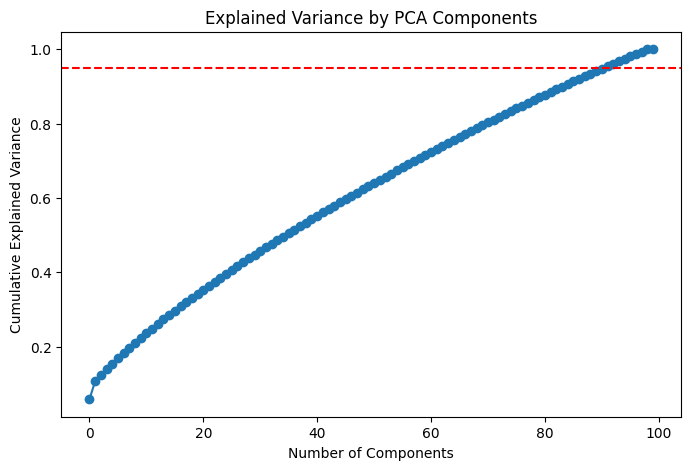

In [1]:
'''Question 10: You are working with a high-dimensional gene expression dataset to
classify patients with different types of cancer.
Due to the large number of features and a small number of samples, traditional models
overfit.
Explain how you would:
● Use PCA to reduce dimensionality
● Decide how many components to keep
● Use KNN for classification post-dimensionality reduction
● Evaluate the model
● Justify this pipeline to your stakeholders as a robust solution for real-world
biomedical data
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.datasets import make_classification

# Simulate high-dimensional gene expression dataset
X, y = make_classification(n_samples=100, n_features=5000,
                           n_informative=50, n_classes=3, random_state=42)

# Step 1: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Step 2: Decide number of components (explained variance)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Number of components to retain (95% variance): {n_components}")

# Reduce dimensionality
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X)

# Step 3: KNN classification
knn = KNeighborsClassifier(n_neighbors=5)

# Step 4: Evaluate with stratified k-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn, X_reduced, y, cv=cv, scoring='accuracy')

print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

# Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()
